### Yolov8 segmetation 학습시키는 코드

bash (json > yolo형식으로 변환)

labelme2yolo --json_dir /home/ted/dev_ws/deeplearing_pj/mask/tolabel/last_f/2_converted/ --output_format polygon

In [ ]:
from ultralytics import YOLO
import torch
import numpy as np


model = YOLO('yolov8n-seg.pt')


counts = np.array([1423, 4122, 307, 3786, 3199, 2383, 680, 815, 635, 1116])

# 역수 기반 가중치 계산: 샘플 수가 적은 클래스에 더 높은 가중치 부여
weights = 1.0 / counts

# 정규화: 전체 가중치의 합이 클래스 수(10)가 되도록 스케일링
weights = weights / weights.sum() * len(counts)

# 모델의 파라미터에서 device 가져오기
device = next(model.model.parameters()).device

# 모델의 device에 맞춰 tensor로 변환
weights_tensor = torch.tensor(weights, dtype=torch.float32, device=device)

# -------------------------------
# 모델의 손실 함수에 클래스 가중치 적용
# (모델 내부 구현에 따라 속성명이 달라질 수 있으므로, 필요 시 수정하세요)
try:
    model.model.loss.ce_weight = weights_tensor
    print("클래스 가중치 적용 성공:", weights_tensor)
except AttributeError:
    print("모델의 loss 함수에 가중치를 적용할 수 없습니다. 해당 부분은 모델 구조에 맞게 커스터마이징 필요.")

# -------------------------------
# 하이퍼파라미터 튜닝을 포함한 학습 실행
results = model.train(
    data='/home/ted/dev_ws/deeplearing_pj/mask/tolabel/last/yolo1/YOLODataset/dataset.yaml',
    epochs=3,            # 총 100 에폭 학습
    imgsz=640,             # 입력 이미지 크기 640x640
    task='segment',        # 세그멘테이션 작업 지정
    hsv_h=0.015,           # HSV Hue 변동 범위
    hsv_s=0.7,             # HSV Saturation 변동 범위
    hsv_v=0.4,             # HSV Value 변동 범위
    degrees=10.0,          # 이미지 회전 범위 (±10도)
    translate=0.1,         # 이미지 이동 범위 (10% 내)
    scale=0.5,             # 이미지 확대/축소 범위 (비율)
    shear=0.2,             # W이미지 전단(shear) 변환 범위
    perspective=0.1,       # 원근(perspective) 변환 강도
    lr0=0.01,              # 초기 학습률
    lrf=0.1,               # 최종 학습률 비율 (초기 대비)
    momentum=0.9,          # 옵티마이저 모멘텀
    weight_decay=0.0005,   # 가중치 감소(정규화)
    patience=10            # 조기 종료 기준: 검증 성능 개선 없을 경우 10 에폭 후 중단
)

print(results)


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()
OpenCV(4.11.0) /io/opencv/modules/highgui/src/window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


image 1/1 /home/ted/dev_ws/deeplearing_pj/0320/31c247961ce8a3b64a094850b53aae5f.jpg: 640x640 2 SO-40s, 8.0ms
Speed: 4.7ms preprocess, 8.0ms inference, 132.6ms postprocess per image at shape (1, 3, 640, 640)
Opening in existing browser session.


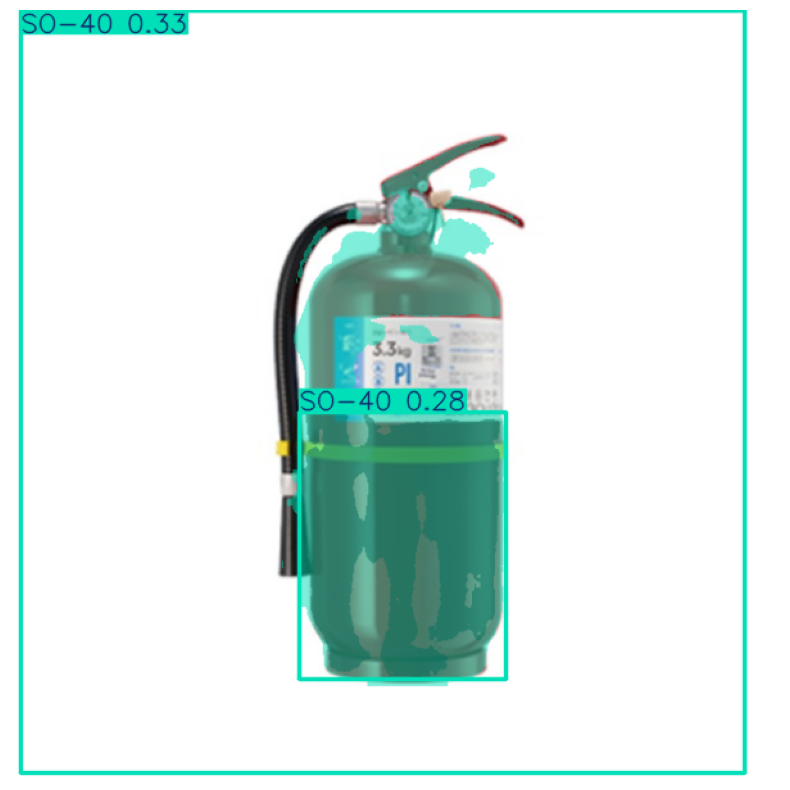

In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# 모델 로드 (훈련된 모델 경로 지정)
model = YOLO('/home/ted/dev_ws/deeplearing_pj/runs/segment/train15/weights/best.pt')  # best.pt가 저장된 위치

# 테스트할 이미지 경로 지정
image_path = '/home/ted/dev_ws/deeplearing_pj/0320/31c247961ce8a3b64a094850b53aae5f.jpg'  # 테스트할 이미지 파일

# 이미지 예측
results = model.predict(image_path, save=False, show=True)  # 결과 저장 및 출력

results[0].show()

# 결과 이미지 표시 (OpenCV 사용)
for result in results:
    img = result.plot()  # 검출된 객체를 포함한 이미지 반환
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

In [ ]:
from ultralytics import YOLO

# segmentation 모델 불러오기 (사전학습된 모델 사용)
model = YOLO("yolov8n-seg.pt")

data_yaml = "/home/ted/dev_ws/deeplearing_pj/mask/tolabel/last_f/2_converted/YOLODataset/dataset.yaml"

model.train(data=data_yaml, epochs=100, imgsz=640, batch=16)